In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('ratings.csv')
ratings.head(5)

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,tt0100814,7,2021-07-15,Tremors,https://www.imdb.com/title/tt0100814/,movie,7.1,96.0,1990,"Comedy, Horror",143582,1990-01-19,Ron Underwood
1,tt1028532,7,2021-04-05,Hachi: A Dog's Tale,https://www.imdb.com/title/tt1028532/,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,2009-06-13,Lasse Hallström
2,tt0102926,6,2021-04-27,The Silence of the Lambs,https://www.imdb.com/title/tt0102926/,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,1991-01-30,Jonathan Demme
3,tt1033575,6,2021-07-15,The Descendants,https://www.imdb.com/title/tt1033575/,movie,7.3,115.0,2011,"Comedy, Drama",245809,2011-09-02,Alexander Payne
4,tt1037705,7,2021-07-15,The Book of Eli,https://www.imdb.com/title/tt1037705/,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,2010-01-11,"Allen Hughes, Albert Hughes"


In [3]:
df = ratings.loc[:, ['Your Rating', 'Date Rated', 'Title Type','IMDb Rating', 'Runtime (mins)', 'Year', 'Genres', 'Num Votes', 'Release Date', 'Directors']]

In [4]:
df.isnull().sum()

Your Rating        0
Date Rated         0
Title Type         0
IMDb Rating        0
Runtime (mins)     1
Year               0
Genres             0
Num Votes          0
Release Date       2
Directors         11
dtype: int64

In [5]:
column_info = pd.DataFrame({
    'Column': df.columns,
    'dtype': df.dtypes,
    'Unique Values': df.nunique()
}).reset_index(drop=True)

column_info

,Column,dtype,Unique Values
0,Your Rating,int64,9
1,Date Rated,object,56
2,Title Type,object,8
3,IMDb Rating,float64,50
4,Runtime (mins),float64,103
5,Year,int64,42
6,Genres,object,208
7,Num Votes,int64,463
8,Release Date,object,441
9,Directors,object,316


### Plots to understand columns

In [6]:
df['Title Type'].value_counts()

movie            447
tvSeries           8
tvSpecial          2
tvMiniSeries       2
video              1
podcastSeries      1
tvShort            1
tvEpisode          1
Name: Title Type, dtype: int64

Text(0, 0.5, 'Count')

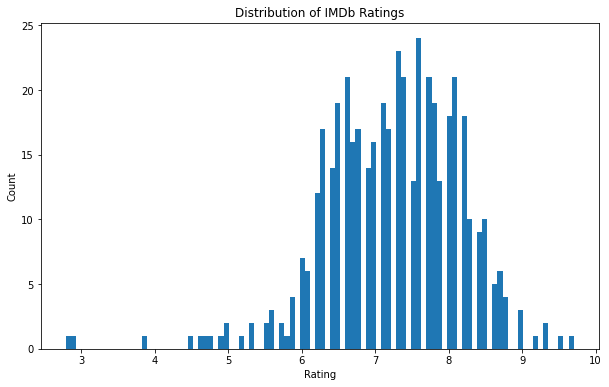

In [7]:
df['IMDb Rating'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

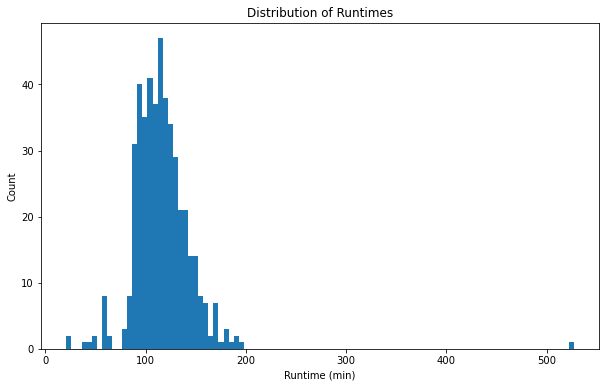

In [8]:
df['Runtime (mins)'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Distribution of Runtimes')
plt.xlabel('Runtime (min)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

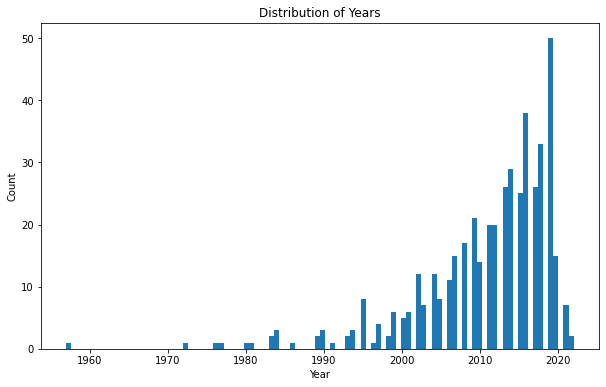

In [9]:
df['Year'].plot(kind='hist', bins=100, figsize=(10, 6))
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')

#### Plot Datetimes

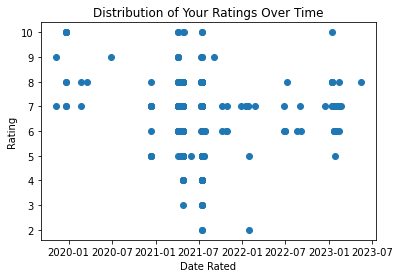

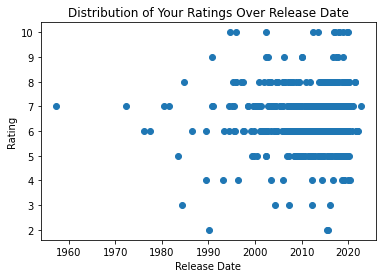

In [11]:
df['Date Rated dt'] = pd.to_datetime(df['Date Rated'])
df['Release Date dt'] = pd.to_datetime(df['Release Date'])
df_timeseries = df.set_index('Date Rated dt').sort_index()

plt.scatter(df_timeseries.index, df_timeseries['Your Rating'])
plt.title('Distribution of Your Ratings Over Time')
plt.xlabel('Date Rated')
plt.ylabel('Rating')
plt.show()

df_timeseries = df.set_index('Release Date dt').sort_index()
plt.scatter(df_timeseries.index, df['Your Rating'])
plt.title('Distribution of Your Ratings Over Release Date')
plt.xlabel('Release Date')
plt.ylabel('Rating')
plt.show()

In [12]:
## Extract year and month information from datetimes

df['Date Rated Year'] = df['Date Rated dt'].dt.year
df['Date Rated Month'] = df['Date Rated dt'].dt.month
df['Release Date Year'] = df['Release Date dt'].dt.year
df['Release Date Month'] = df['Release Date dt'].dt.month
df.head(5)

,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Date Rated dt,Release Date dt,Date Rated Year,Date Rated Month,Release Date Year,Release Date Month
0,7,2021-07-15,movie,7.1,96.0,1990,"Comedy, Horror",143582,1990-01-19,Ron Underwood,2021-07-15,1990-01-19,2021,7,1990.0,1.0
1,7,2021-04-05,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,2009-06-13,Lasse Hallström,2021-04-05,2009-06-13,2021,4,2009.0,6.0
2,6,2021-04-27,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,1991-01-30,Jonathan Demme,2021-04-27,1991-01-30,2021,4,1991.0,1.0
3,6,2021-07-15,movie,7.3,115.0,2011,"Comedy, Drama",245809,2011-09-02,Alexander Payne,2021-07-15,2011-09-02,2021,7,2011.0,9.0
4,7,2021-07-15,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,2010-01-11,"Allen Hughes, Albert Hughes",2021-07-15,2010-01-11,2021,7,2010.0,1.0


### Generate distinct columns for Genres

In [13]:
df['Genres'].value_counts()

Drama                                                                   18
Action, Adventure, Sci-Fi                                               16
Action, Adventure, Fantasy, Sci-Fi                                      15
Comedy                                                                  15
Comedy, Drama                                                           14
                                                                        ..
Biography, Crime, Drama, History, Mystery                                1
Animation, Action, Adventure, Comedy, Crime, Family, Mystery, Sci-Fi     1
Action, Adventure, Drama, Sci-Fi, Thriller                               1
Animation, Adventure, Comedy, Drama, Family, Fantasy                     1
Comedy, Family                                                           1
Name: Genres, Length: 208, dtype: int64

In [14]:
df['Genres Split'] = df.apply(lambda x: [part.strip() for part in x['Genres'].split(',')], axis=1)
df.head(5)

,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Date Rated dt,Release Date dt,Date Rated Year,Date Rated Month,Release Date Year,Release Date Month,Genres Split
0,7,2021-07-15,movie,7.1,96.0,1990,"Comedy, Horror",143582,1990-01-19,Ron Underwood,2021-07-15,1990-01-19,2021,7,1990.0,1.0,"[Comedy, Horror]"
1,7,2021-04-05,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,2009-06-13,Lasse Hallström,2021-04-05,2009-06-13,2021,4,2009.0,6.0,"[Biography, Drama, Family]"
2,6,2021-04-27,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,1991-01-30,Jonathan Demme,2021-04-27,1991-01-30,2021,4,1991.0,1.0,"[Crime, Drama, Thriller]"
3,6,2021-07-15,movie,7.3,115.0,2011,"Comedy, Drama",245809,2011-09-02,Alexander Payne,2021-07-15,2011-09-02,2021,7,2011.0,9.0,"[Comedy, Drama]"
4,7,2021-07-15,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,2010-01-11,"Allen Hughes, Albert Hughes",2021-07-15,2010-01-11,2021,7,2010.0,1.0,"[Action, Adventure, Drama, Thriller]"


In [15]:
encoded_columns = pd.get_dummies(df['Genres Split'].apply(pd.Series).stack()).sum(level=0)

# Concatenate encoded columns with the original DataFrame
df = pd.concat([df, encoded_columns], axis=1)
df.head(5)

C:\Users\batuk\AppData\Local\Temp/ipykernel_15756/2855483109.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  encoded_columns = pd.get_dummies(df['Genres Split'].apply(pd.Series).stack()).sum(level=0)


,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,7,2021-07-15,movie,7.1,96.0,1990,"Comedy, Horror",143582,1990-01-19,Ron Underwood,...,0,0,0,0,0,0,0,0,0,0
1,7,2021-04-05,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,2009-06-13,Lasse Hallström,...,0,0,0,0,0,0,0,0,0,0
2,6,2021-04-27,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,1991-01-30,Jonathan Demme,...,0,0,0,0,0,0,0,1,0,0
3,6,2021-07-15,movie,7.3,115.0,2011,"Comedy, Drama",245809,2011-09-02,Alexander Payne,...,0,0,0,0,0,0,0,0,0,0
4,7,2021-07-15,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,2010-01-11,"Allen Hughes, Albert Hughes",...,0,0,0,0,0,0,0,1,0,0


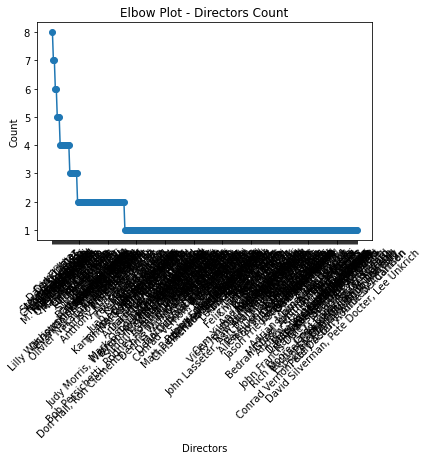

In [16]:
directors_count = df['Directors'].value_counts()

plt.plot(directors_count.index, directors_count.values, marker='o')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Elbow Plot - Directors Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
directors_count[directors_count > 3].index

Index(['Steven Spielberg', 'David Fincher', 'Christopher Nolan',
       'Martin Scorsese', 'Cem Yilmaz', 'David Yates', 'Gore Verbinski',
       'M. Night Shyamalan', 'Nuri Bilge Ceylan', 'Asghar Farhadi',
       'George Lucas', 'Robert Zemeckis', 'Peter Jackson', 'Francis Lawrence',
       'Paul Greengrass', 'James Mangold', 'Quentin Tarantino',
       'Todd Phillips'],
      dtype='object')

### One-Hot Encoding for titles

In [18]:
### One Hot Encoding Title Type

# Perform one-hot encoding
encoded_columns = pd.get_dummies(df['Title Type'], prefix='Title')

# Concatenate encoded columns with the original DataFrame
df_encoded = pd.concat([df, encoded_columns], axis=1)
df_encoded.head(5)

,Your Rating,Date Rated,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,War,Western,Title_movie,Title_podcastSeries,Title_tvEpisode,Title_tvMiniSeries,Title_tvSeries,Title_tvShort,Title_tvSpecial,Title_video
0,7,2021-07-15,movie,7.1,96.0,1990,"Comedy, Horror",143582,1990-01-19,Ron Underwood,...,0,0,1,0,0,0,0,0,0,0
1,7,2021-04-05,movie,8.1,93.0,2009,"Biography, Drama, Family",295970,2009-06-13,Lasse Hallström,...,0,0,1,0,0,0,0,0,0,0
2,6,2021-04-27,movie,8.6,118.0,1991,"Crime, Drama, Thriller",1472178,1991-01-30,Jonathan Demme,...,0,0,1,0,0,0,0,0,0,0
3,6,2021-07-15,movie,7.3,115.0,2011,"Comedy, Drama",245809,2011-09-02,Alexander Payne,...,0,0,1,0,0,0,0,0,0,0
4,7,2021-07-15,movie,6.8,118.0,2010,"Action, Adventure, Drama, Thriller",327789,2010-01-11,"Allen Hughes, Albert Hughes",...,0,0,1,0,0,0,0,0,0,0
